# How to create the bounding boxes?
* Create the largest bounding box for each class of the label 
    * recursively do this for each label and then choose the largest bounding box to infer a square bounding box size
* step 1: Try to do this for a binary task and then generalize
* 3D bounding box detection?
* Possible Problems
    * What if the max bounding box of the test set is greater than the one in the training set?
        * __L__
    * Overfitting?
    * Limited view so maybe not as great at predicting?
* Set b_h, b_w to the constant patch sizes as the labels, so it will always predict those patch sizes
* __Pipeline:__
    * Find max b_h, b_w (2D patch size)
        * problem: lots of blank inputs in 3D crop (how about 2D patches only?)
        * make sure patch size is compatible with the segmentation network
    * Create labels: p_c, b_x, b_y with those b_h and b_w
        * How do find b_x and b_y?
        * YOLO?
    

In [6]:
import nibabel as nib
import os
import numpy as np
from glob import glob
dset_path = "C:\\Users\\Joseph\\kits19\\data"
case_paths = glob(dset_path + "\\*\\", recursive = True)
print(len(case_paths))

210


In [10]:
# testing example
label = nib.load(case_paths[0] + "segmentation.nii.gz").get_fdata()
print("shape: ", label.shape, "\nUnique: ", np.unique(label))

shape:  (611, 512, 512) 
Unique:  [ 0.  1.  2.]


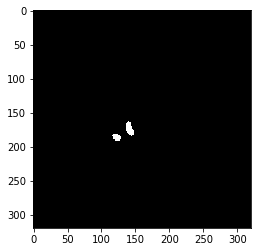

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
n_slice = 50
plt.imshow(label[n_slice], cmap = "bone")

In [30]:
def extract_largest_bbox(mask, coords = False):
    """
    Resizing image around a specified region (i.e. nonzero region)
    Args:
        image: assumes a mask where the background class is 0
        coords: boolean on whether or not to return boundaries (bounding box coords) (optional; default: False)
    Returns:
        cropped segmentation mask
        a nested list of the mins and and maxes of each axis (when coords = True)
    """
    pos_idx = np.where(mask != 0)
    # fetching all of the min/maxes for each axes
    pos_x, pos_y, pos_z = pos_idx[1], pos_idx[2], pos_idx[0]
    minZidx, maxZidx = int(np.min(pos_z)), int(np.max(pos_z)) + 1
    minXidx, maxXidx = int(np.min(pos_x)), int(np.max(pos_x)) + 1
    minYidx, maxYidx = int(np.min(pos_y)), int(np.max(pos_y)) + 1
    # resize images
    resizer = (slice(minZidx, maxZidx), slice(minXidx, maxXidx), slice(minYidx, maxYidx))
    coord_list = [[minZidx, maxZidx], [minXidx, maxXidx], [minYidx, maxYidx]]
    # returns cropped outputs with the bbox coordinates
    if coords:
        return (mask[resizer], coord_list)
    # returns just cropped outputs
    elif not coords:
        return (mask[resizer])

Shape:  (66, 59, 45)


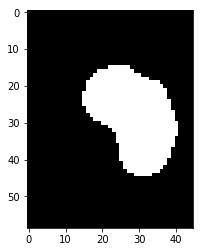

In [33]:
frame, coords = extract_largest_bbox(label, coords = True)
print("Shape: ", frame.shape)
n_slice = 50
plt.imshow(frame[n_slice], cmap = 'bone')

In [34]:
# finding largest bounding box in dataset
import nibabel as nib
import os
import numpy as np
from glob import glob
dset_path = "C:\\Users\\Joseph\\MSD\\MSD_raw\\Task02_Heart\\labelsTr"
fpaths = glob(os.path.join(dset_path,"*.nii"), recursive = True)

bbox_shapes = []
for fname in fpaths:
    _label = nib.load(fname).get_fdata().T
    extracted = extract_largest_bbox(_label)
    bbox_shapes.append(np.asarray(extracted.shape))
max_shape = tuple(np.max(bbox_shapes, axis = 0))

In [35]:
print(max_shape)

(79, 79, 54)
